# Values text comparison
## with OpenAI embeddings

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load texts
df_texts = pd.read_csv("values_texts_2.csv")
df_texts

,user_id,value_text
0,1,What matters most to me is that everyone respe...
1,2,I care most about fairness in how we share cho...
2,3,Honest and compassionate communication matters...
3,4,"For me, the most important thing is living sus..."
4,5,What I value most is that people look out for ...
5,6,It’s essential to me that the community is inc...
6,7,Eating together regularly is what matters most...
7,8,The most important thing for me is that the pl...
8,9,I love when people bring creative energy — org...
9,10,Trust is what makes communal living work. I va...


In [ ]:
from openai import OpenAI

MY_API_KEY = ""
client = OpenAI(api_key=MY_API_KEY)

def get_embedding(text):
    response = client.embeddings.create(
        model="text-embedding-3-small",
        input=text
    )
    return np.array(response.data[0].embedding)


In [14]:
# Calculate embeddings and similarity for the texts in the dataframe

scores = []

for i in range(len(df_texts)):
    text_a = df_texts.loc[i, 'value_text']
    embed_a = get_embedding(text_a)
    scores.append(embed_a)


In [15]:
scores

[array([ 0.03798849,  0.00114997,  0.0668225 , ..., -0.00022325,
         0.00869546,  0.02529118]),
 array([ 0.06138516,  0.00864268,  0.01423826, ..., -0.00102666,
         0.02452913, -0.01203603]),
 array([ 0.03659159,  0.01383043,  0.0211596 , ..., -0.02658862,
        -0.00322009,  0.02235399]),
 array([ 0.03749879,  0.01915937,  0.05958263, ..., -0.00477276,
        -0.00064528,  0.01418504]),
 array([ 0.02147966, -0.01263206,  0.00653238, ...,  0.00712975,
         0.00604802,  0.02049803]),
 array([ 0.04994025, -0.02543176, -0.00495206, ...,  0.00822545,
        -0.00478769,  0.02341736]),
 array([ 0.00079595, -0.02664884,  0.06207149, ...,  0.01431311,
         0.01143216,  0.00035705]),
 array([ 0.0071167 ,  0.02224384, -0.03095306, ..., -0.02905528,
         0.0191397 ,  0.02873162]),
 array([ 0.00451518, -0.00417533,  0.01032041, ..., -0.00832291,
         0.00840614, -0.00727561]),
 array([0.02209676, 0.00119093, 0.02050215, ..., 0.00149244, 0.01231469,
        0.01058608

In [16]:
# Calculate cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(scores)

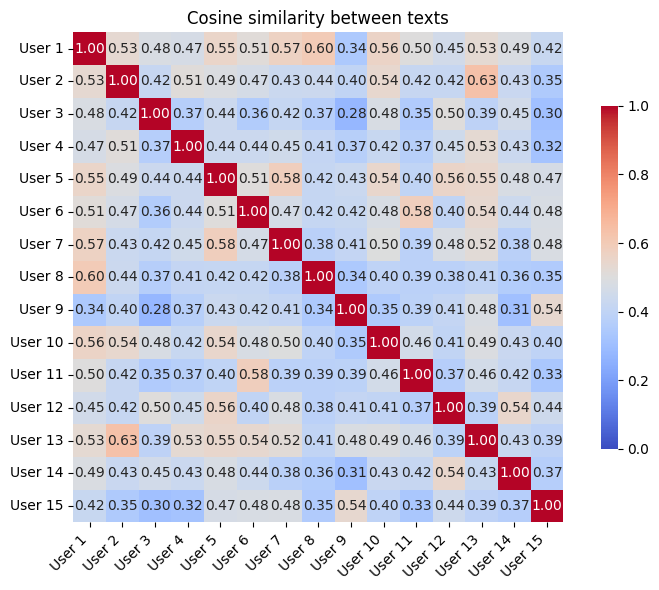

In [18]:
# Friendly row/col labels
n = cosine_sim.shape[0]
labels = [f'User {i+1}' for i in range(n)]

# Simple heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cosine_sim, xticklabels=labels, yticklabels=labels, annot=True, fmt=".2f",
            cmap="coolwarm", vmin=0, vmax=1, square=True, cbar_kws={"shrink":0.7})
plt.title("Cosine similarity between texts")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()